# Đọc data

In [1]:
import numpy as np

# Đây là những dữ liệu đã giảm chiều về 255
# Read train data
train_images = np.load('../data_processed/train_images_datav2.npy')
train_labels = np.load('../data_processed/train_labels_datav2.npy')

# Read validation data
val_images = np.load('../data_processed/val_images_datav2.npy')
val_labels = np.load('../data_processed/val_labels_datav2.npy')

# # Read test data
# test_images = np.load('../data_processed/test_images_datav2.npy')
# test_labels = np.load('../data_processed/test_labels_datav2.npy')

In [2]:
# Prepare data and labels
X_train = train_images
y_train = train_labels

X_val = val_images
y_val = val_labels

# X_test = test_images
# y_test = test_labels
X_test = val_images
y_test = val_labels

# Setup hàm lưu model, trực quan kết quả đánh giá

In [10]:
import joblib
import seaborn as sn

def plot_cf(y_true, y_pred):
    import pandas as pd
    import matplotlib.pyplot as plt
    data = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (10,7))
    sn.set_theme(font_scale=1.4) # for label size
    sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

In [20]:
# Biểu đồ lịch sử huấn luyện
def plot_training_history(history):
    import matplotlib.pyplot as plt
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Setup MLP

In [6]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()

In [7]:
# Kiến trúc của mạng neural network
architecture = mlp.get_params()

print(architecture)

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [8]:
mlp.fit(X_train, y_train)

MLPClassifier()

In [11]:
# Save the model_rbf to a file
joblib.dump(mlp, 'mlp.pkl')

['mlp.pkl']

Confusion Matrix:
[[144  63  86 119  88]
 [ 74 197 113  68  48]
 [ 83  70 265  61  21]
 [ 75  23  25 359  18]
 [ 44  60  59  56 281]]
              precision    recall  f1-score   support

           0       0.34      0.29      0.31       500
           1       0.48      0.39      0.43       500
           2       0.48      0.53      0.51       500
           3       0.54      0.72      0.62       500
           4       0.62      0.56      0.59       500

    accuracy                           0.50      2500
   macro avg       0.49      0.50      0.49      2500
weighted avg       0.49      0.50      0.49      2500



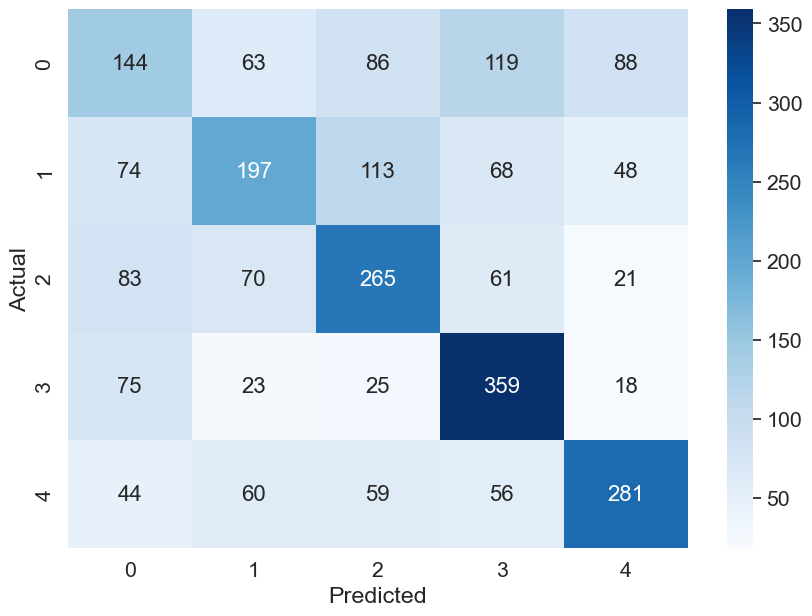

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict labels for the test set
y_test_pred = mlp.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)
print(classification_report(y_test, y_test_pred))
plot_cf(y_test, y_test_pred)

# Setup ANN

In [14]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# Setup ANN 1

In [17]:
# Xây dựng mô hình ANN
model = models.Sequential(
    [
        layers.InputLayer(shape=(225,)),
        layers.BatchNormalization(),
        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(5, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_4           │ (None, 225)            │           900 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        57,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,065 (238.54 KB)

 Trainable params: 60,103 (234.78 KB)

 Non-trainable params: 962 (3.76 KB)

In [18]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
# Callback để lưu lại model có accuracy cao nhất trên tập validation
checkpoint = callbacks.ModelCheckpoint(
    "ann1.keras", monitor="val_accuracy", save_best_only=True, mode="max"
)

In [19]:
# Huấn luyện mô hình
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint],
)

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2498 - loss: 2.4309 - val_accuracy: 0.3996 - val_loss: 1.4361
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4531 - loss: 1.4327 - val_accuracy: 0.4420 - val_loss: 1.3299
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5272 - loss: 1.2094 - val_accuracy: 0.4576 - val_loss: 1.3055
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5591 - loss: 1.1133 - val_accuracy: 0.4676 - val_loss: 1.2840
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5971 - loss: 1.0112 - val_accuracy: 0.4788 - val_loss: 1.2751
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6343 - loss: 0.9525 - val_accuracy: 0.4896 - val_loss: 1.2620
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6436 - loss: 0.9060 - val_accuracy: 0.4868 - val_loss: 1.2710
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6936 - loss: 0.8260 - val_accu

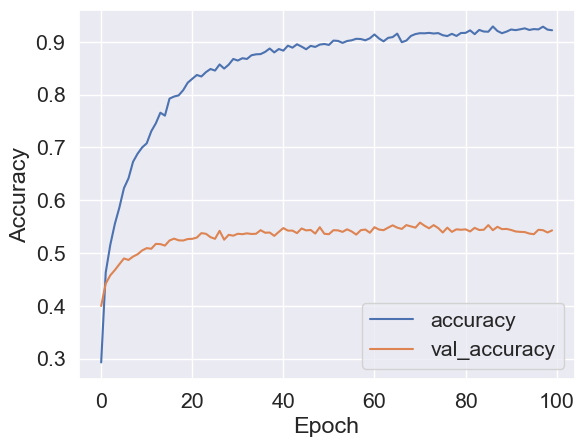

In [21]:
plot_training_history(history)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion Matrix:
[[161  50  78 168  43]
 [ 62 226  85  86  41]
 [ 83  82 263  51  21]
 [ 62  19  30 368  21]
 [ 30  42  51  38 339]]
              precision    recall  f1-score   support

           0       0.40      0.32      0.36       500
           1       0.54      0.45      0.49       500
           2       0.52      0.53      0.52       500
           3       0.52      0.74      0.61       500
           4       0.73      0.68      0.70       500

    accuracy                           0.54      2500
   macro avg       0.54      0.54      0.54      2500
weighted avg       0.54      0.54      0.54      2500



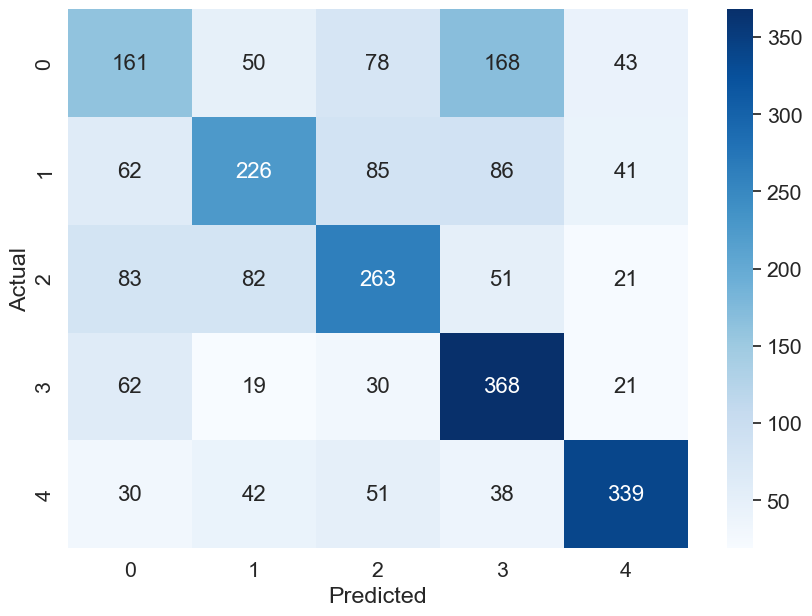

In [23]:
# Predict labels for the test set
y_test_pred = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)
print(classification_report(y_test, y_test_pred))
plot_cf(y_test, y_test_pred)

# Setup ANN 2

In [24]:
# Xây dựng mô hình ANN
model = models.Sequential(
    [
        layers.InputLayer(shape=(225,)),
        layers.BatchNormalization(),
        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(5, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_6           │ (None, 225)            │           900 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        57,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127,881 (499.54 KB)

 Trainable params: 126,407 (493.78 KB)

 Non-trainable params: 1,474 (5.76 KB)

In [25]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
# Callback để lưu lại model có accuracy cao nhất trên tập validation
checkpoint = callbacks.ModelCheckpoint(
    "ann2.keras", monitor="val_accuracy", save_best_only=True, mode="max"
)

In [26]:
# Huấn luyện mô hình
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint],
)

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2421 - loss: 2.4149 - val_accuracy: 0.3912 - val_loss: 1.4630
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3547 - loss: 1.7077 - val_accuracy: 0.4396 - val_loss: 1.3313
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4531 - loss: 1.4063 - val_accuracy: 0.4408 - val_loss: 1.3133
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4830 - loss: 1.2794 - val_accuracy: 0.4476 - val_loss: 1.2989
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5093 - loss: 1.2099 - val_accuracy: 0.4556 - val_loss: 1.2951
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5296 - loss: 1.1548 - val_accuracy: 0.4620 - val_loss: 1.2875
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5773 - loss: 1.0569 - val_accuracy: 0.4644 - val_loss: 1.2937
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5871 - loss: 1.0391 - val_accu

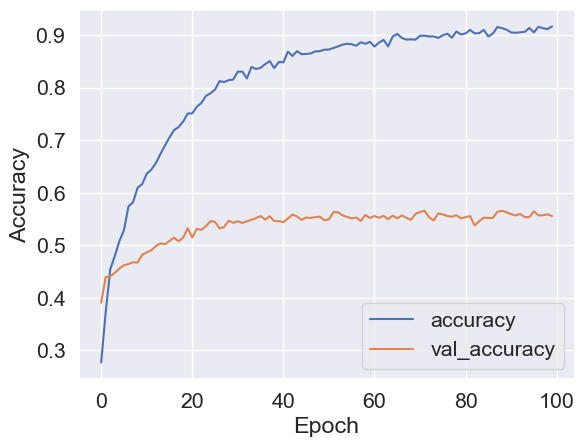

In [27]:
plot_training_history(history)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Confusion Matrix:
[[186  46  81 152  35]
 [ 64 228  88  82  38]
 [ 96  60 279  47  18]
 [ 67  19  24 369  21]
 [ 32  44  56  41 327]]
              precision    recall  f1-score   support

           0       0.42      0.37      0.39       500
           1       0.57      0.46      0.51       500
           2       0.53      0.56      0.54       500
           3       0.53      0.74      0.62       500
           4       0.74      0.65      0.70       500

    accuracy                           0.56      2500
   macro avg       0.56      0.56      0.55      2500
weighted avg       0.56      0.56      0.55      2500



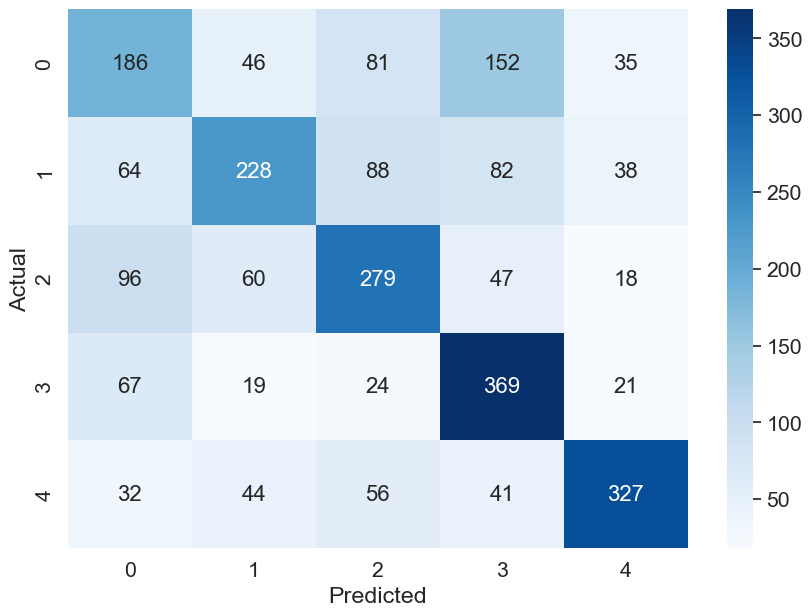

In [28]:
# Predict labels for the test set
y_test_pred = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)
print(classification_report(y_test, y_test_pred))
plot_cf(y_test, y_test_pred)

# Setup ANN 3

In [30]:
# Xây dựng mô hình ANN
model = models.Sequential(
    [
        layers.InputLayer(shape=(225,)),
        layers.BatchNormalization(),
        layers.Dense(256 * 2, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256 * 3, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256 * 2, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(5, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_13          │ (None, 225)            │           900 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       115,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 768)            │       393,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 768)            │         3,072 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 914,057 (3.49 MB)

 Trainable params: 910,023 (3.47 MB)

 Non-trainable params: 4,034 (15.76 KB)

In [31]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
# Callback để lưu lại model có accuracy cao nhất trên tập validation
checkpoint = callbacks.ModelCheckpoint(
    "ann3.keras", monitor="val_accuracy", save_best_only=True, mode="max"
)

In [32]:
# Huấn luyện mô hình
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint],
)

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2473 - loss: 2.5342 - val_accuracy: 0.4148 - val_loss: 1.3799
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4007 - loss: 1.6734 - val_accuracy: 0.4436 - val_loss: 1.3471
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4444 - loss: 1.4412 - val_accuracy: 0.4420 - val_loss: 1.3283
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4992 - loss: 1.2438 - val_accuracy: 0.4312 - val_loss: 1.3465
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5484 - loss: 1.1481 - val_accuracy: 0.4592 - val_loss: 1.3228
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5596 - loss: 1.0742 - val_accuracy: 0.4516 - val_loss: 1.3374
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6043 - loss: 1.0136 - val_accuracy: 0.4668 - val_loss: 1.3069
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6274 - loss: 0.9396 - val_accu

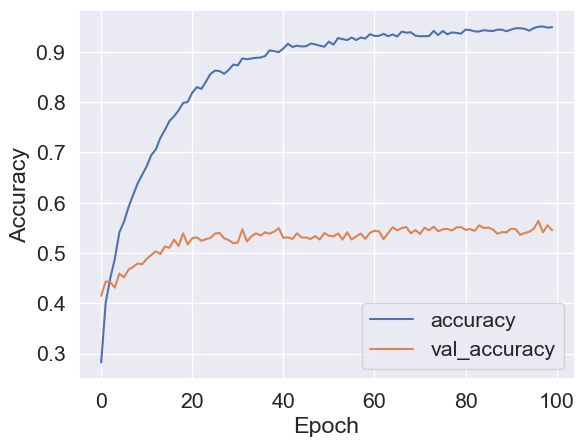

In [33]:
plot_training_history(history)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Confusion Matrix:
[[158  38  87 184  33]
 [ 60 213  98  88  41]
 [ 82  53 294  57  14]
 [ 53  18  30 379  20]
 [ 45  30  66  40 319]]
              precision    recall  f1-score   support

           0       0.40      0.32      0.35       500
           1       0.61      0.43      0.50       500
           2       0.51      0.59      0.55       500
           3       0.51      0.76      0.61       500
           4       0.75      0.64      0.69       500

    accuracy                           0.55      2500
   macro avg       0.55      0.55      0.54      2500
weighted avg       0.55      0.55      0.54      2500



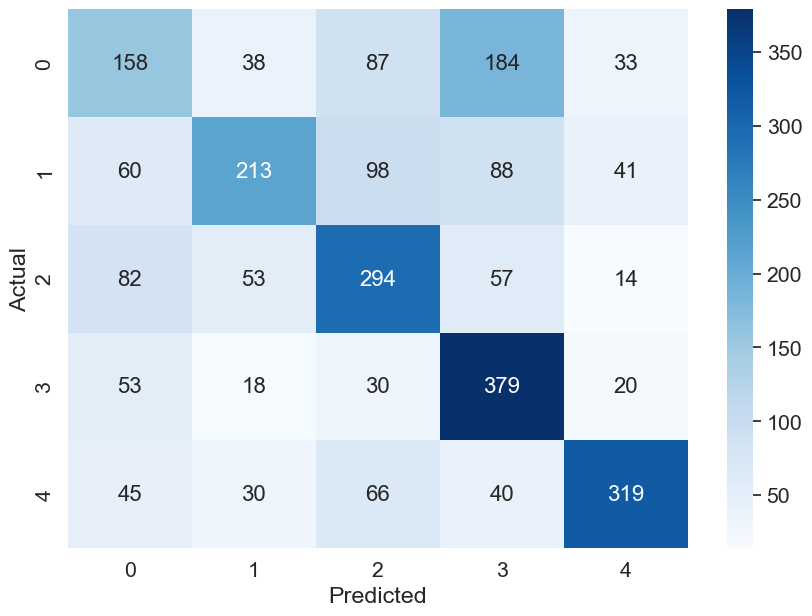

In [34]:
# Predict labels for the test set
y_test_pred = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)
print(classification_report(y_test, y_test_pred))
plot_cf(y_test, y_test_pred)

# Setup ANN 4

In [36]:
# Xây dựng mô hình ANN
model = models.Sequential(
    [
        layers.InputLayer(shape=(225,)),
        layers.BatchNormalization(),
        layers.Dense(256 * 2, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256 * 3, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256 * 2, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(128, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(32, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(5, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_24          │ (None, 225)            │           900 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 512)            │       115,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 768)            │       393,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 768)            │         3,072 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 512)            │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,081,673 (4.13 MB)

 Trainable params: 1,076,807 (4.11 MB)

 Non-trainable params: 4,866 (19.01 KB)

In [37]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
# Callback để lưu lại model có accuracy cao nhất trên tập validation
checkpoint = callbacks.ModelCheckpoint(
    "ann4.keras", monitor="val_accuracy", save_best_only=True, mode="max"
)

In [38]:
# Huấn luyện mô hình
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint],
)

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2196 - loss: 2.3896 - val_accuracy: 0.2124 - val_loss: 1.6489
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2368 - loss: 1.9257 - val_accuracy: 0.2240 - val_loss: 1.7354
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.2566 - loss: 1.7024 - val_accuracy: 0.2264 - val_loss: 1.7556
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.2908 - loss: 1.5632 - val_accuracy: 0.2440 - val_loss: 1.6775
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.3205 - loss: 1.5128 - val_accuracy: 0.2636 - val_loss: 1.6428
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.3502 - loss: 1.4591 - val_accuracy: 0.2796 - val_loss: 1.5950
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3622 - loss: 1.4230 - val_accuracy: 0.2932 - val_loss: 1.5645
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3741 - loss: 1.3934 - 

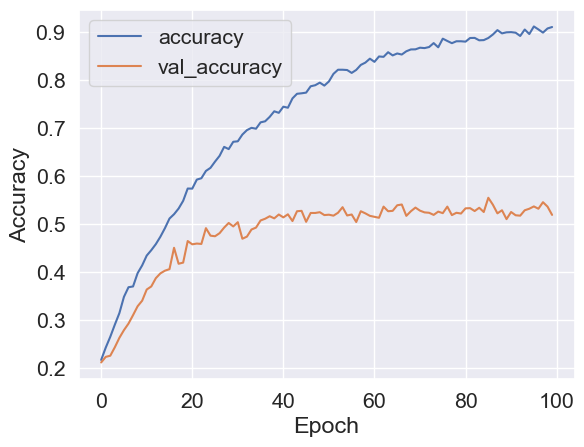

In [39]:
plot_training_history(history)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Confusion Matrix:
[[178  25  57 223  17]
 [103 182  89  96  30]
 [129  34 265  65   7]
 [ 73  12  17 387  11]
 [ 61  32  63  58 286]]
              precision    recall  f1-score   support

           0       0.33      0.36      0.34       500
           1       0.64      0.36      0.46       500
           2       0.54      0.53      0.53       500
           3       0.47      0.77      0.58       500
           4       0.81      0.57      0.67       500

    accuracy                           0.52      2500
   macro avg       0.56      0.52      0.52      2500
weighted avg       0.56      0.52      0.52      2500



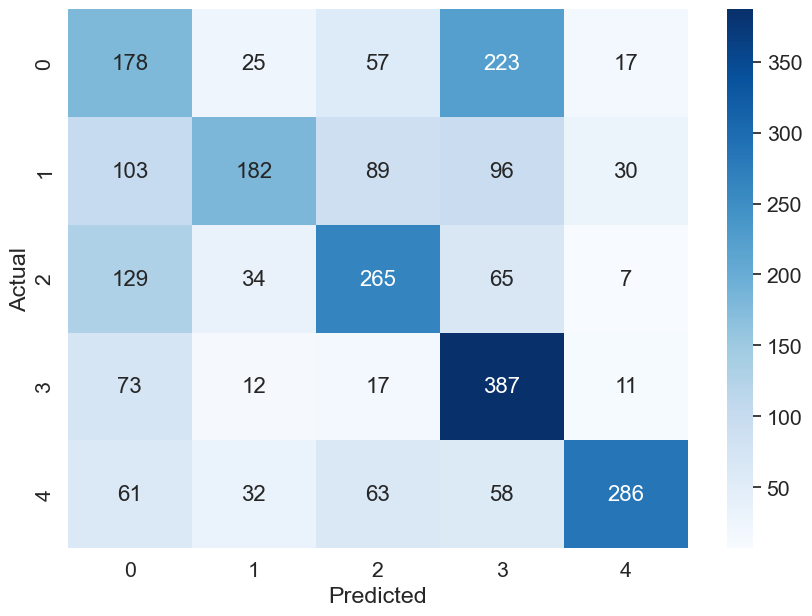

In [40]:
# Predict labels for the test set
y_test_pred = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(cm)
print(classification_report(y_test, y_test_pred))
plot_cf(y_test, y_test_pred)